In [1]:
# make the plots appear within the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

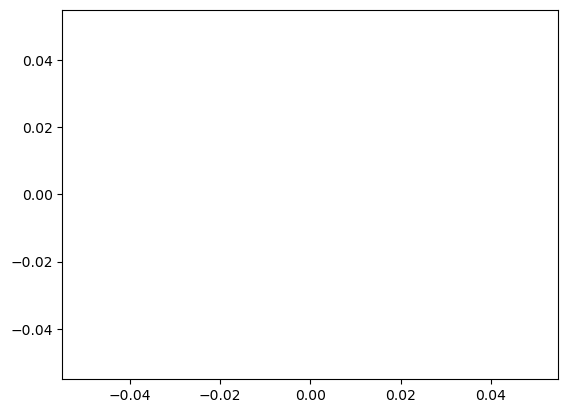

In [2]:
plt.plot();

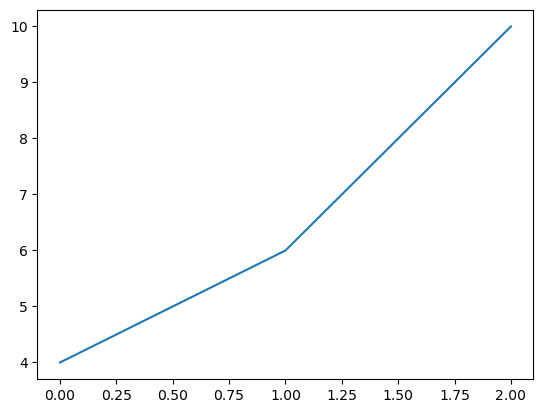

In [3]:
plt.plot([4,6,10]);

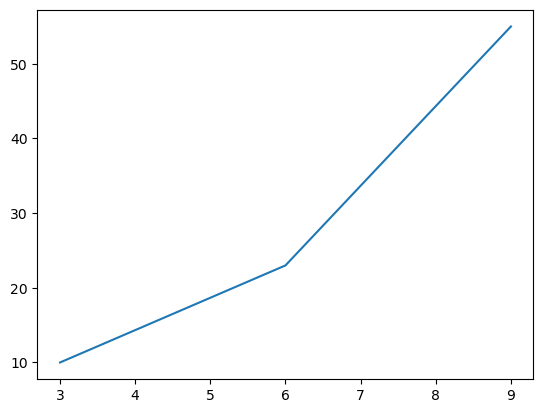

In [4]:
x = [3, 6, 9]
y = [10,23,55]
plt.plot(x,y);

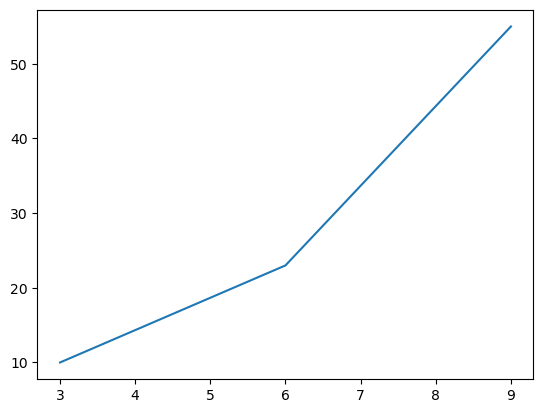

In [5]:
fig , ax = plt.subplots()
ax.plot(x, y);


In [6]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

## MatPlotLib workflow

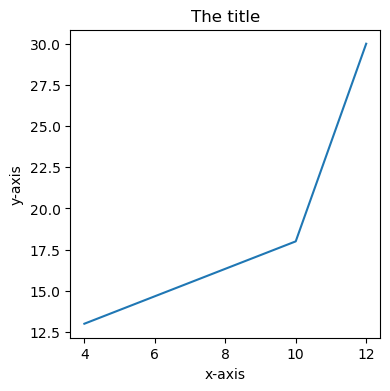

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [4, 10, 12]
y = [13, 18, 30]

# 2. Set up plot
fig , ax = plt.subplots(figsize=(4,4))

# 3. add data
ax.plot(x,y);

# 4. Customize plot
ax.set(title="The title",
      xlabel="x-axis",
      ylabel="y-axis");

# 5. Save the figure
fig.savefig("images/plot.png");

## Making figures with numpy arrays

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x = np.linspace(0, 10, 100)

In [10]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [11]:
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

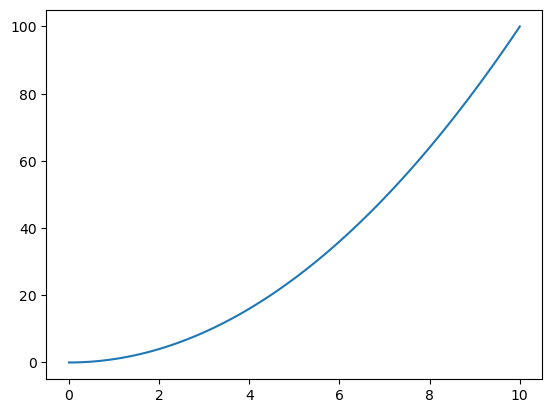

In [12]:
fig, ax = plt.subplots()
ax = plt.plot(x, x**2); # default is a line plot

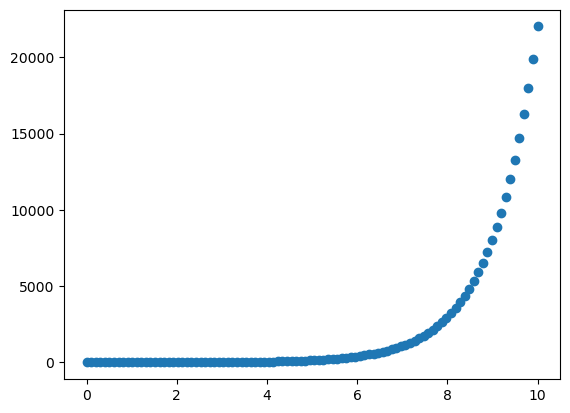

In [13]:
fig, ax = plt.subplots()
ax = plt.scatter(x, np.exp(x))

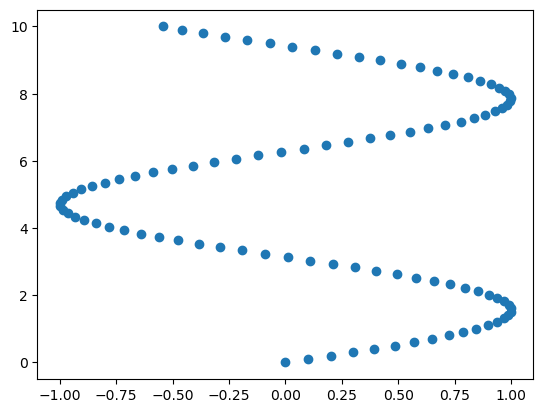

In [14]:
fig, ax = plt.subplots()
ax = plt.scatter(np.sin(x), x);

## Make a plot from a dictionary

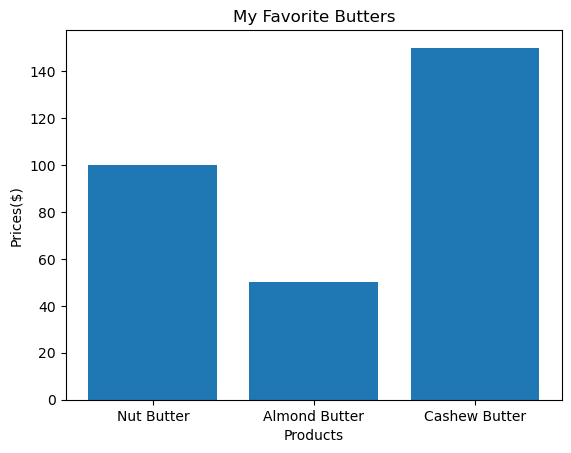

In [15]:
nut_butter_prices = { 
                    "Nut Butter": 100,
                    "Almond Butter": 50,
                    "Cashew Butter": 150
                    }
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax.set(title="My Favorite Butters", ylabel="Prices($)", xlabel="Products");

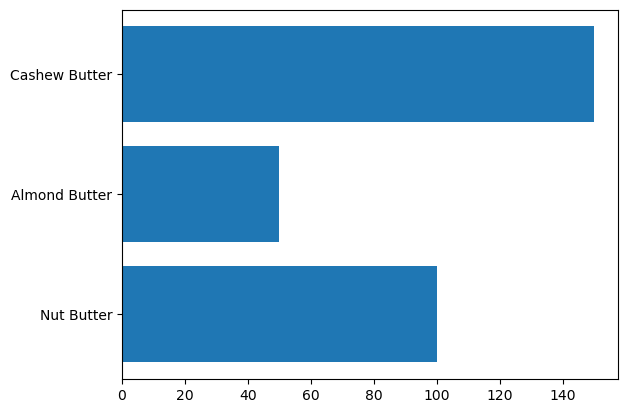

In [16]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

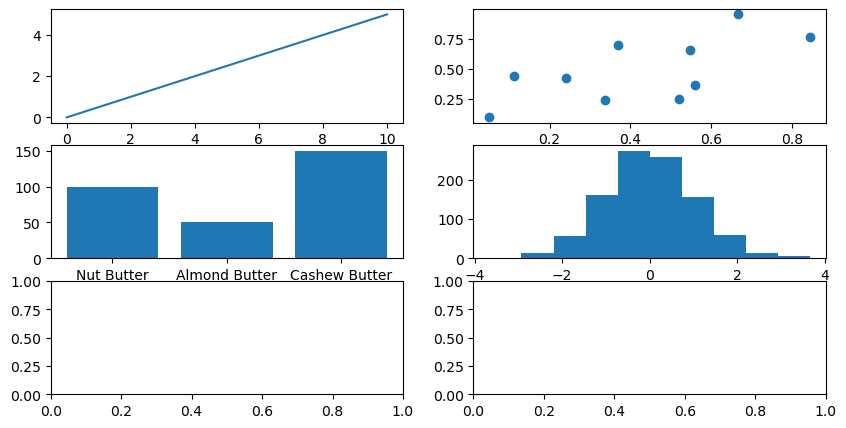

In [17]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(10,5)
)
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

## Plotting from pandas dataframes

In [18]:
import pandas as pd
import numpy as np

In [19]:
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

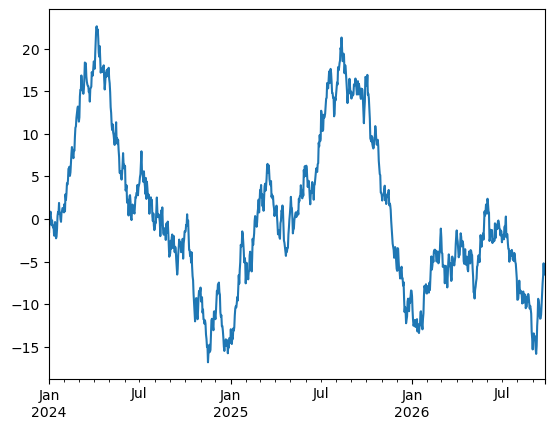

In [20]:
# example from pandas docs
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2024", periods=1000))
ts = ts.cumsum()
ts.plot()

In [21]:
# Car sales
# In your specific case, the issue arises because you're using \$ in the string inside the str.replace method. 
# The backslash (\) is being interpreted as an escape character, but $ is not a recognized escape character.
# Here’s how you can fix this:
# Use a raw string by prefixing the string with r to treat backslashes as literal characters.
# Double the backslashes to escape them properly.
# car_sales["Price"] = car_sales["Price"].str.replace('[\\$\\,\\.]', '', regex=True)

car_sales["Price"] = car_sales["Price"].str.replace(r'[\$\,\.]', '', regex=True)
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [22]:
# Remove the extra two zeros at the end
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [23]:
car_sales["Date"] = pd.date_range("1/1/2024", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [24]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


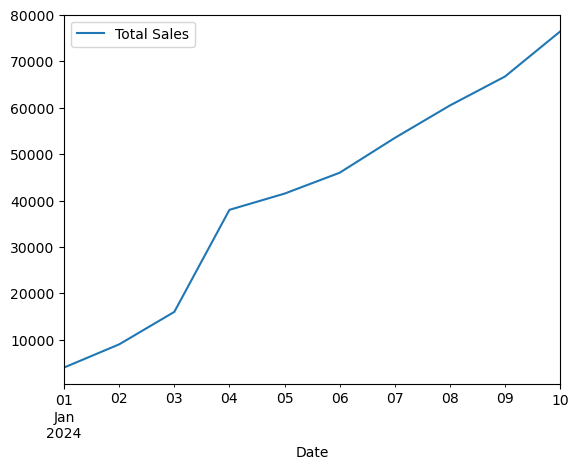

In [25]:
# Using pandas matplotlib
car_sales.plot(x="Date", y="Total Sales");

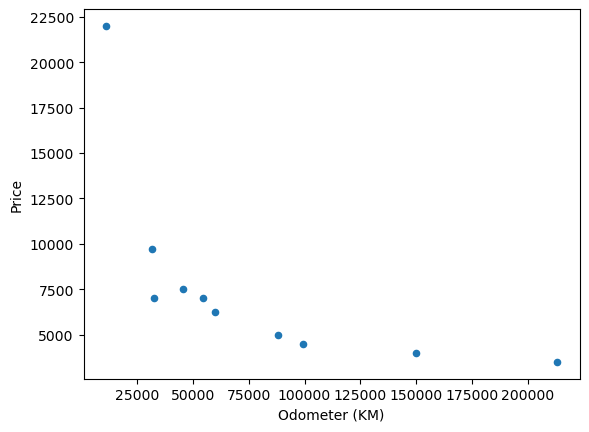

In [26]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

<Axes: xlabel='Price', ylabel='Doors'>

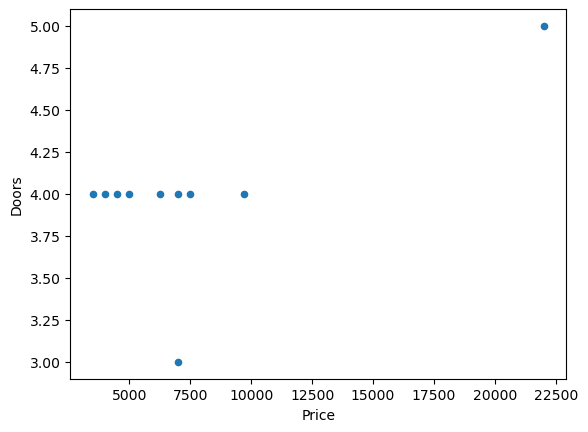

In [27]:
car_sales.plot(x="Price", y="Doors", kind="scatter")

In [28]:
x = np.random.rand(10,4)
x

df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.171637,0.418219,0.634075,0.737182
1,0.288518,0.476764,0.723673,0.308263
2,0.913754,0.351549,0.550492,0.081499
3,0.147730,0.132427,0.739217,0.887513
4,0.334066,0.749696,0.648063,0.205226
5,0.329553,0.039726,0.910012,0.094638
6,0.071388,0.013282,0.908972,0.180236
7,0.910986,0.916088,0.158838,0.353421
8,0.411394,0.455785,0.027258,0.454440
9,0.104513,0.691908,0.427228,0.111116


<Axes: >

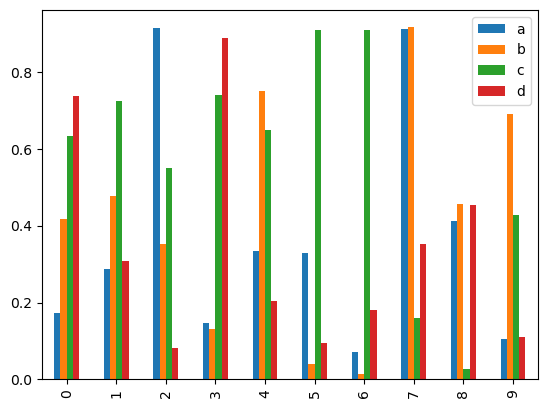

In [29]:
df.plot.bar()

<Axes: >

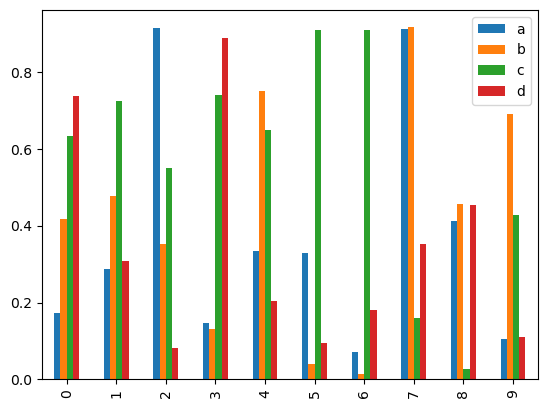

In [30]:
# Another way
df.plot(kind="bar")

## Heart disease

In [31]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='Frequency'>

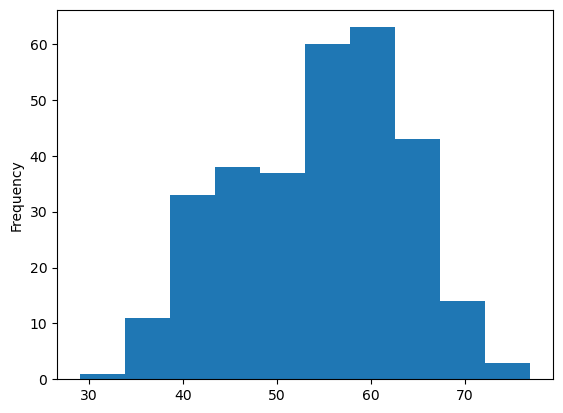

In [32]:
heart_disease["age"].plot.hist()

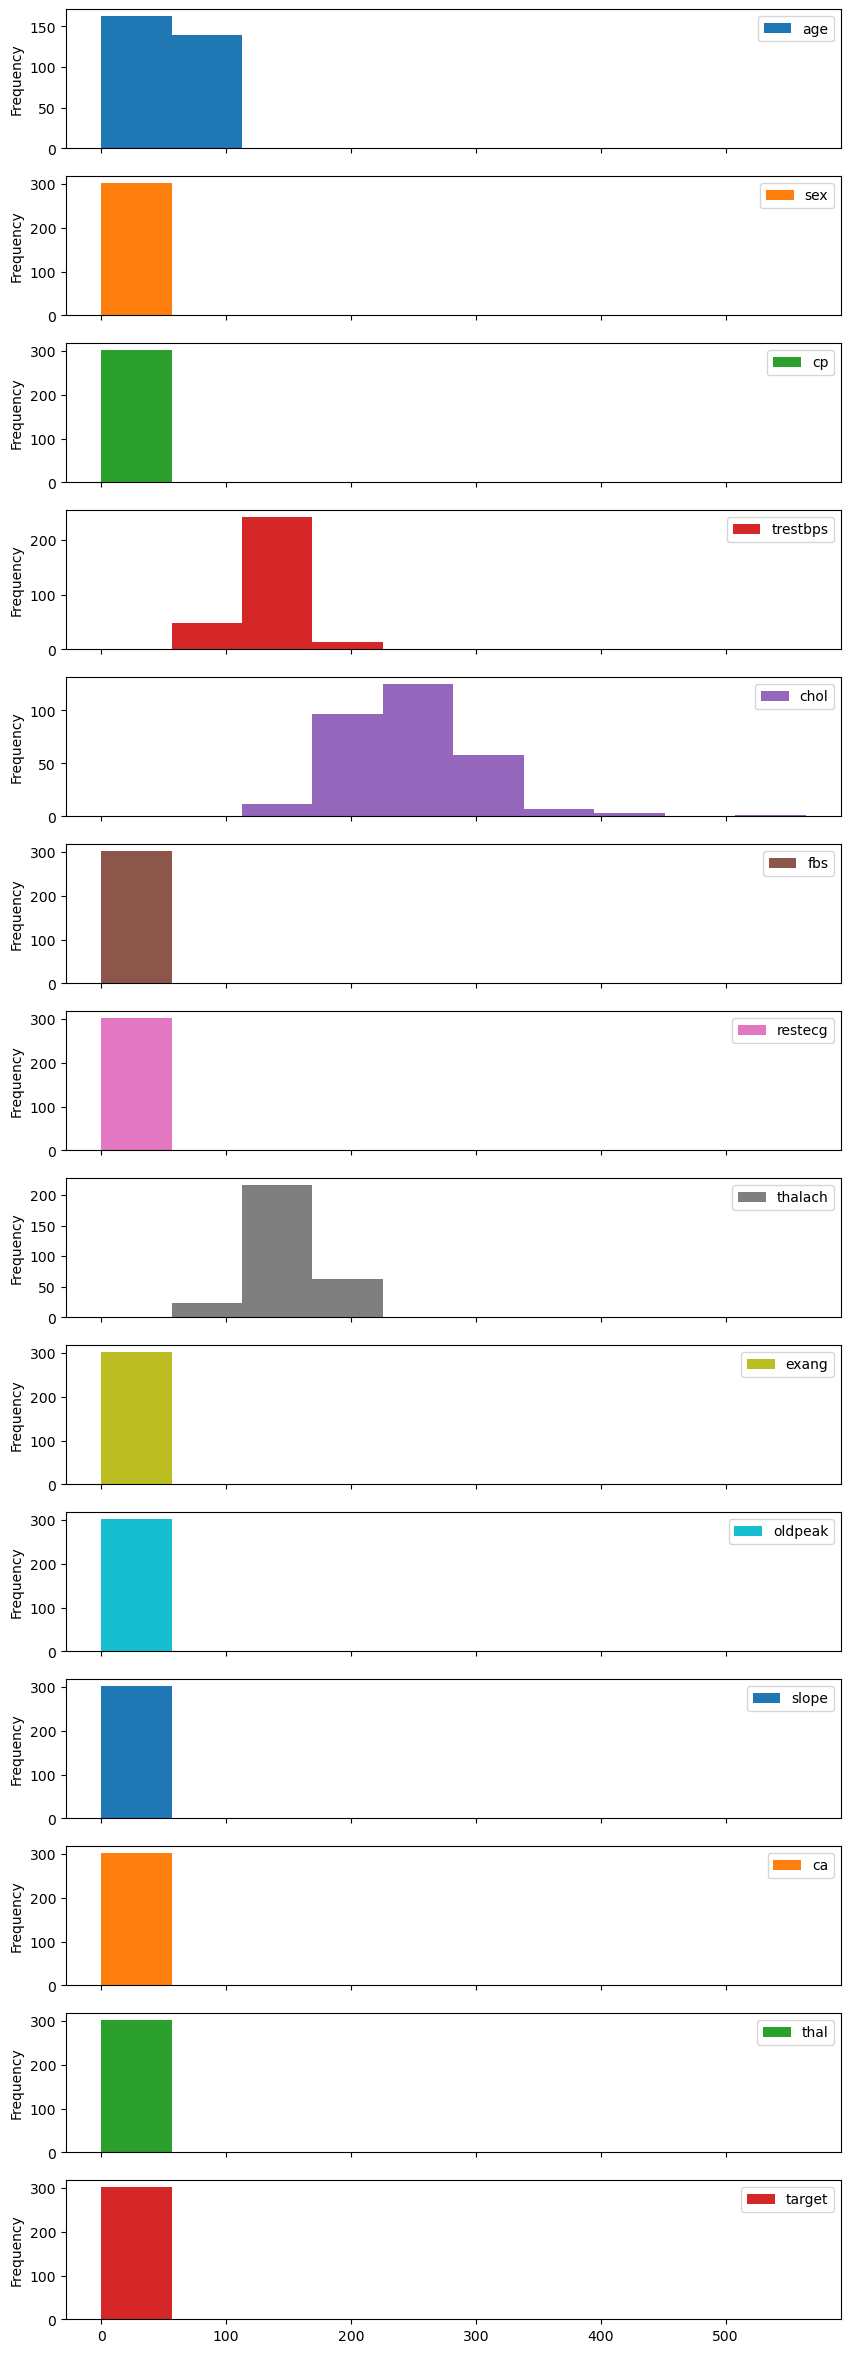

In [33]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);

In [37]:
over_50 = heart_disease[heart_disease["age"] > 50]
len(over_50)
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


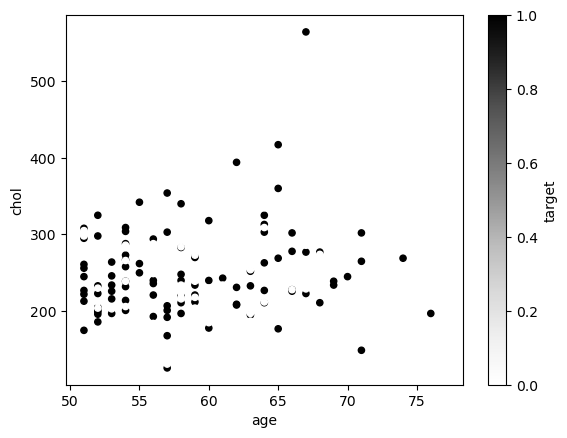

In [39]:
# pyplot method
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

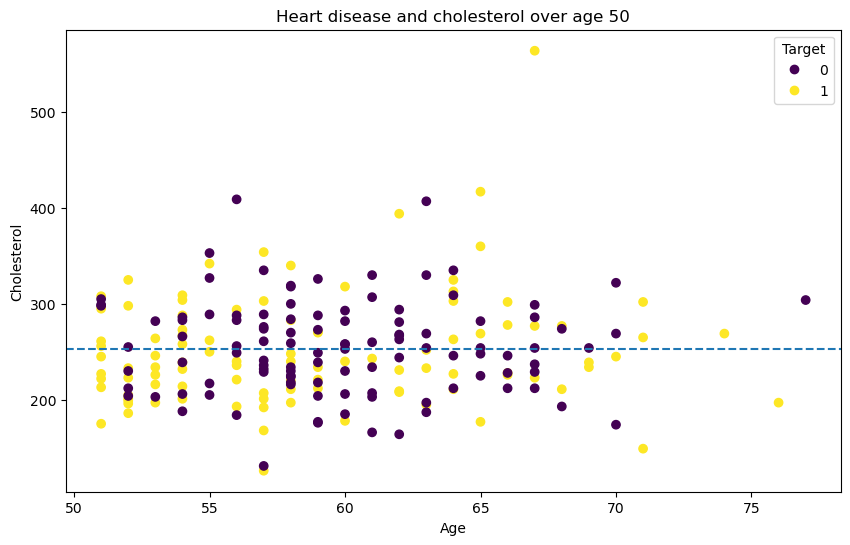

In [84]:
# OO method
fig, ax = plt.subplots(figsize=(10, 6))
# over_50.plot(kind="scatter",
#                   x="age",
#                   y="chol",
#                   c="target",
#             ax=ax);

# Plot the data
scatter = ax.scatter(
    x=over_50["age"],
    y=over_50["chol"],
    c=over_50["target"]
);

# ax.set_xlim([45, 100]);
ax.set(title="Heart disease and cholesterol over age 50",
        xlabel="Age",
        ylabel="Cholesterol",
      );

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle="--");

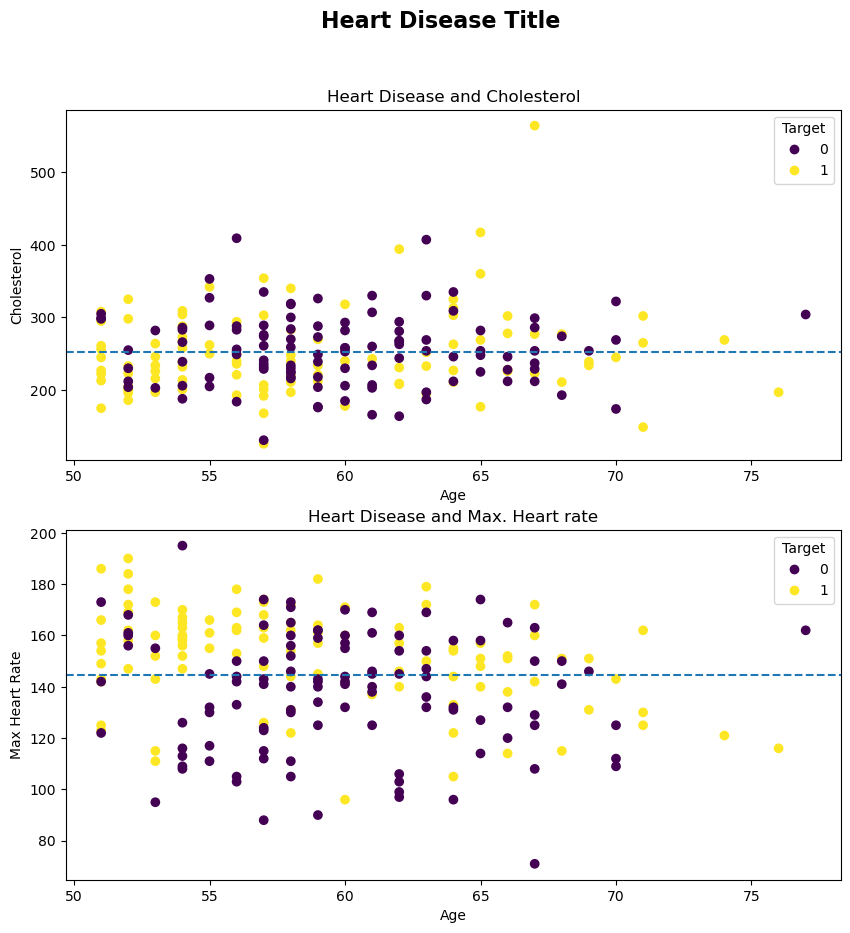

In [103]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10));
# Plot the data
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"]);
# Customize the labes
ax0.set(title="Heart Disease and Cholesterol", xlabel="Age", ylabel="Cholesterol")
# add a legend
ax0.legend(*scatter.legend_elements(), title="Target");
# add horizontal mean line
ax0.axhline(over_50["chol"].mean(), linestyle="--");

# ax1

# plot the data
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"]);
# customize the labels
ax1.set(title="Heart Disease and Max. Heart rate", xlabel="Age", ylabel="Max Heart Rate");
# add a legend
ax1.legend(*scatter.legend_elements(), title="Target");

# add a horizontal mean line 
ax1.axhline(over_50["thalach"].mean(), linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Title", fontsize=16, fontweight="bold");

# Customizing matplotlib plots

In [105]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [106]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


<Axes: >

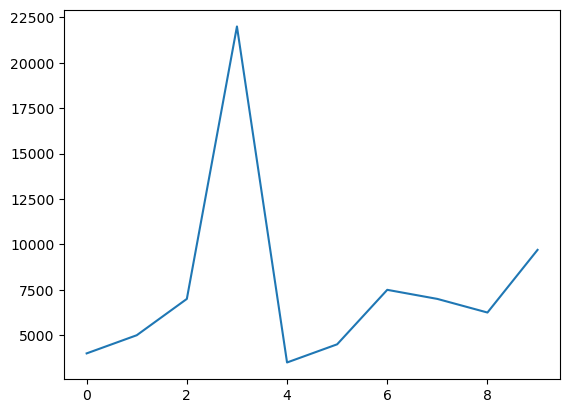

In [107]:
car_sales["Price"].plot()

In [118]:
plt.style.use('seaborn-v0_8-darkgrid');

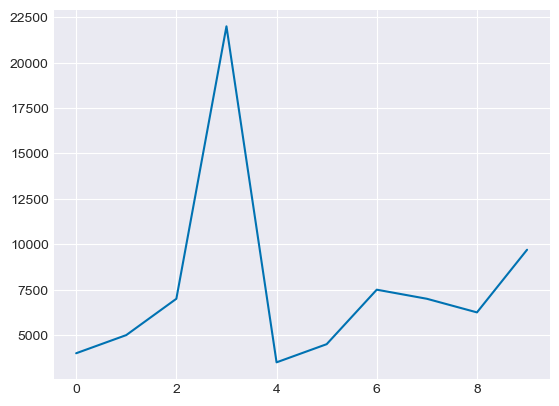

In [119]:
car_sales["Price"].plot();